In [39]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
import os, sys

def get_dir_n_levels_up(path, n):
    # Go up n levels from the given path
    for _ in range(n):
        path = os.path.dirname(path)
    return path

proj_root = get_dir_n_levels_up(os.path.abspath("__file__"), 4)
sys.path.append(proj_root)

import pandas as pd
import yaml
import torch
import collections

import warnings
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

warnings.filterwarnings("ignore")

from dqn.opinion_dynamics.utils.experiment import process_experiment


In [41]:
# experiment_sub_dir = "2025May02-101004_configs" # excellent run
experiment_sub_dir = "2025Jun23-095316_configs"

exp_path = os.path.join(os.path.abspath("."), "results", experiment_sub_dir)
df = process_experiment(
    exp_path
)
df.columns


Index(['epoch_type', 'frame_stamp', 'greedy_epsilon', 'episode_rewards_min',
       'episode_rewards_max', 'episode_rewards_mean', 'episode_rewards_median',
       'episode_rewards_std', 'episode_discounted_rewards_min',
       'episode_discounted_rewards_max', 'episode_discounted_rewards_mean',
       'episode_discounted_rewards_median', 'episode_discounted_rewards_std',
       'episode_frames_min', 'episode_frames_max', 'episode_frames_mean',
       'episode_frames_median', 'episode_frames_std', 'episode_losses_min',
       'episode_losses_max', 'episode_losses_mean', 'episode_losses_median',
       'episode_losses_std', 'episode_max_qs_min', 'episode_max_qs_max',
       'episode_max_qs_mean', 'episode_max_qs_median', 'episode_max_qs_std',
       'policy_trained_times', 'target_trained_times', 'epoch_time',
       'sub_exp_cfg_optim.args_.weight_decay', 'sub_exp_cfg_optim.args_.betas',
       'sub_exp_cfg_optim.args_.lr', 'sub_experiment_path', 'seed',
       'experiment_name'],
    

In [42]:
df

,epoch_type,frame_stamp,greedy_epsilon,episode_rewards_min,episode_rewards_max,episode_rewards_mean,episode_rewards_median,episode_rewards_std,episode_discounted_rewards_min,episode_discounted_rewards_max,...,episode_max_qs_std,policy_trained_times,target_trained_times,epoch_time,sub_exp_cfg_optim.args_.weight_decay,sub_exp_cfg_optim.args_.betas,sub_exp_cfg_optim.args_.lr,sub_experiment_path,seed,experiment_name
0,training,200000,0.971500,-7.443088,-1.440048,-4.433644,-4.423410,0.834034,-6.959482,-1.412451,...,0.766596,48749.0,192.0,0 days 00:06:07.684385,0,"[0.9, 0.999]",1e-05,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_optim.args_.weight_decay_0__optim.args_.b...
1,training,400000,0.942269,-7.603068,-1.734844,-4.476259,-4.444135,0.839277,-7.112953,-1.694157,...,0.818216,50000.0,200.0,0 days 00:06:34.102970,0,"[0.9, 0.999]",1e-05,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_optim.args_.weight_decay_0__optim.args_.b...
2,training,600000,0.913038,-7.678306,-1.705000,-4.448465,-4.418151,0.827523,-7.169587,-1.666311,...,1.120045,50000.0,200.0,0 days 00:06:51.474828,0,"[0.9, 0.999]",1e-05,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_optim.args_.weight_decay_0__optim.args_.b...
3,training,800000,0.883808,-7.419000,-1.682625,-4.410860,-4.386707,0.827695,-6.941533,-1.643517,...,1.242104,50000.0,200.0,0 days 00:06:56.508527,0,"[0.9, 0.999]",1e-05,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_optim.args_.weight_decay_0__optim.args_.b...
4,training,1000000,0.854577,-7.569634,-1.793920,-4.389836,-4.363549,0.819784,-7.069442,-1.750075,...,1.233371,50000.0,200.0,0 days 00:06:55.759999,0,"[0.9, 0.999]",1e-05,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_optim.args_.weight_decay_0__optim.args_.b...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,validation,7200000,NaN,-8.079168,-8.079075,-8.079111,-8.079111,0.000020,-7.547865,-7.547782,...,1.929786,NaN,NaN,0 days 00:00:00.520949,0.001,"[0.5, 0.999]",1e-05,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,2,0005_optim.args_.weight_decay_0.001__optim.arg...
1436,validation,7400000,NaN,-8.078218,-8.078115,-8.078156,-8.078154,0.000023,-7.546962,-7.546871,...,1.923930,NaN,NaN,0 days 00:00:00.531078,0.001,"[0.5, 0.999]",1e-05,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,2,0005_optim.args_.weight_decay_0.001__optim.arg...
1437,validation,7600000,NaN,-8.079479,-8.079390,-8.079438,-8.079438,0.000016,-7.548043,-7.547964,...,1.926516,NaN,NaN,0 days 00:00:00.403470,0.001,"[0.5, 0.999]",1e-05,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,2,0005_optim.args_.weight_decay_0.001__optim.arg...
1438,validation,7800000,NaN,-8.078889,-8.078790,-8.078841,-8.078846,0.000020,-7.547475,-7.547386,...,1.937170,NaN,NaN,0 days 00:00:00.362022,0.001,"[0.5, 0.999]",1e-05,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,2,0005_optim.args_.weight_decay_0.001__optim.arg...


In [43]:
# df[df['epoch_type'] == 'validation']
df[df['epoch_type'] == 'training']


,epoch_type,frame_stamp,greedy_epsilon,episode_rewards_min,episode_rewards_max,episode_rewards_mean,episode_rewards_median,episode_rewards_std,episode_discounted_rewards_min,episode_discounted_rewards_max,...,episode_max_qs_std,policy_trained_times,target_trained_times,epoch_time,sub_exp_cfg_optim.args_.weight_decay,sub_exp_cfg_optim.args_.betas,sub_exp_cfg_optim.args_.lr,sub_experiment_path,seed,experiment_name
0,training,200000,0.971500,-7.443088,-1.440048,-4.433644,-4.423410,0.834034,-6.959482,-1.412451,...,0.766596,48749.0,192.0,0 days 00:06:07.684385,0,"[0.9, 0.999]",1e-05,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_optim.args_.weight_decay_0__optim.args_.b...
1,training,400000,0.942269,-7.603068,-1.734844,-4.476259,-4.444135,0.839277,-7.112953,-1.694157,...,0.818216,50000.0,200.0,0 days 00:06:34.102970,0,"[0.9, 0.999]",1e-05,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_optim.args_.weight_decay_0__optim.args_.b...
2,training,600000,0.913038,-7.678306,-1.705000,-4.448465,-4.418151,0.827523,-7.169587,-1.666311,...,1.120045,50000.0,200.0,0 days 00:06:51.474828,0,"[0.9, 0.999]",1e-05,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_optim.args_.weight_decay_0__optim.args_.b...
3,training,800000,0.883808,-7.419000,-1.682625,-4.410860,-4.386707,0.827695,-6.941533,-1.643517,...,1.242104,50000.0,200.0,0 days 00:06:56.508527,0,"[0.9, 0.999]",1e-05,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_optim.args_.weight_decay_0__optim.args_.b...
4,training,1000000,0.854577,-7.569634,-1.793920,-4.389836,-4.363549,0.819784,-7.069442,-1.750075,...,1.233371,50000.0,200.0,0 days 00:06:55.759999,0,"[0.9, 0.999]",1e-05,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_optim.args_.weight_decay_0__optim.args_.b...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,training,7200000,0.050000,-7.690752,-1.698395,-4.468454,-4.436854,0.828297,-7.182032,-1.659460,...,1.335253,50000.0,200.0,0 days 00:07:56.312066,0.001,"[0.5, 0.999]",1e-05,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,2,0005_optim.args_.weight_decay_0.001__optim.arg...
1396,training,7400000,0.050000,-7.538149,-1.388977,-4.465417,-4.435888,0.830033,-7.053967,-1.360879,...,1.337144,50000.0,200.0,0 days 00:07:57.800028,0.001,"[0.5, 0.999]",1e-05,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,2,0005_optim.args_.weight_decay_0.001__optim.arg...
1397,training,7600000,0.050000,-7.757856,-1.861754,-4.474244,-4.441249,0.835900,-7.247281,-1.809388,...,1.336633,50000.0,200.0,0 days 00:08:08.321851,0.001,"[0.5, 0.999]",1e-05,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,2,0005_optim.args_.weight_decay_0.001__optim.arg...
1398,training,7800000,0.050000,-7.789983,-1.749635,-4.465632,-4.452577,0.833632,-7.278070,-1.707106,...,1.339946,50000.0,200.0,0 days 00:08:01.023997,0.001,"[0.5, 0.999]",1e-05,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,2,0005_optim.args_.weight_decay_0.001__optim.arg...


In [44]:
# Define hyperparameter columns
hyperparam_columns = [col for col in df.columns if "sub_exp_cfg" in col]

# Group by hyperparameter values and compute mean episode_rewards_mean
averaged_results = df.groupby(hyperparam_columns, as_index=False).agg({
    'episode_rewards_mean': 'mean',  # Averaging the performance metric
    'sub_experiment_path': 'first'   # Keep a reference to an experiment path
})

# Find the best hyperparameter set based on the highest mean reward
best_row = averaged_results.loc[averaged_results['episode_rewards_mean'].idxmax()]

# Print the best experiment path and hyperparameters
print(f"Best hyperparameters:\n{best_row[hyperparam_columns]}")
print(f"Best mean reward: {best_row['episode_rewards_mean']}")

Best hyperparameters:
sub_exp_cfg_optim.args_.weight_decay               0
sub_exp_cfg_optim.args_.betas           [0.5, 0.999]
sub_exp_cfg_optim.args_.lr                     1e-05
Name: 0, dtype: object
Best mean reward: -6.159937467583577


In [45]:
averaged_results

,sub_exp_cfg_optim.args_.weight_decay,sub_exp_cfg_optim.args_.betas,sub_exp_cfg_optim.args_.lr,episode_rewards_mean,sub_experiment_path
0,0,"[0.5, 0.999]",1e-05,-6.159937,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...
1,0,"[0.9, 0.999]",1e-05,-6.160597,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...
2,0,"[0.95, 0.9]",1e-05,-6.182401,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...
3,0.001,"[0.5, 0.999]",1e-05,-6.310075,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...
4,0.001,"[0.9, 0.999]",1e-05,-6.313970,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...
5,0.001,"[0.95, 0.9]",1e-05,-6.310811,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...


In [46]:
# selected_metric = 'episode_rewards_mean'
# hue_col = "sub_exp_cfg_agent_params.args_.action_w_noise_amplitude"

# # Filter for validation episodes
# validation_df = df[df['epoch_type'] == 'validation']

# # Get the unique sorted frame_stamp values
# unique_frames = np.sort(validation_df['frame_stamp'].unique())
# N = 1
# # Get all frame_stamp values after the first N unique ones
# filtered_frames = unique_frames[N:]

# # Filter the DataFrame to only include rows with these frame_stamp values
# filtered_df = validation_df[validation_df['frame_stamp'].isin(filtered_frames)]

# plt.figure(figsize=(10, 6))
# sns.lineplot(data=filtered_df, x='frame_stamp', y=selected_metric, hue=hue_col)
# plt.ylabel(selected_metric)
# plt.xlabel('Frame Stamp')
# plt.show()

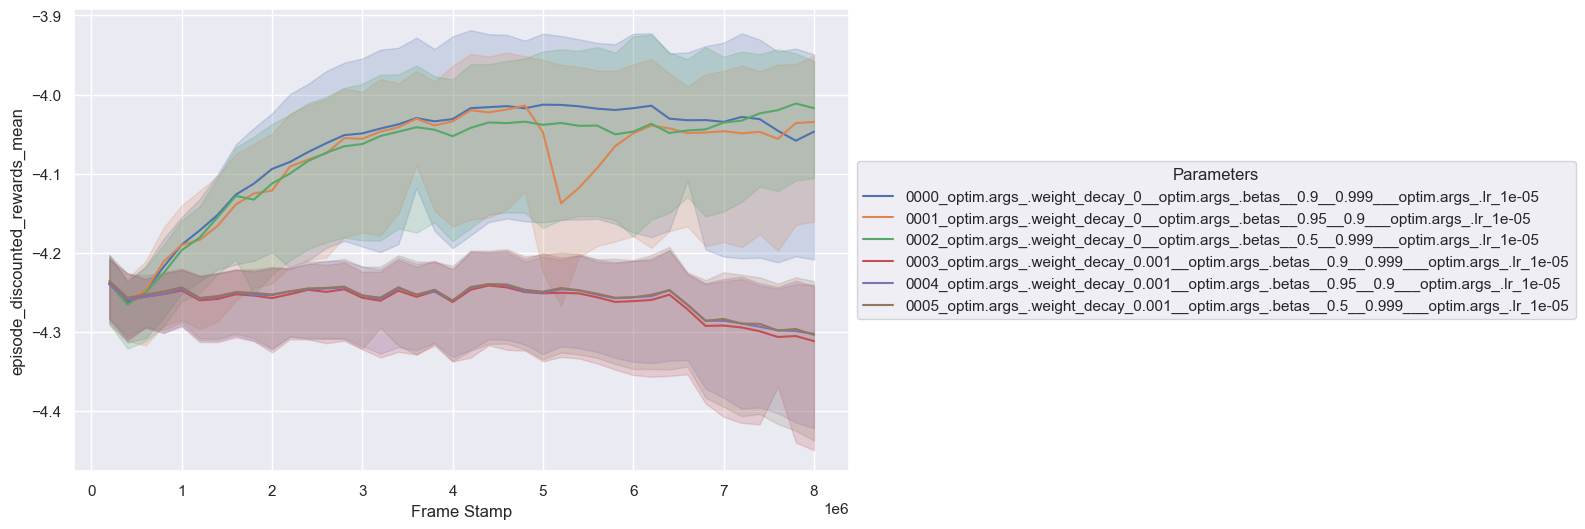

In [47]:

selected_metric = 'episode_discounted_rewards_mean'
# hue_col = "sub_exp_cfg_agent_params.args_.action_w_noise_amplitude"
hue_col = "experiment_name"

# validation_df = df[df['epoch_type'] == 'validation']
validation_df = df[df['epoch_type'] == 'training']


# Create a new figure for each environment
plt.figure(figsize=(10, 6))
# sns.lineplot(data=df, x='frame_stamp', y=selected_metric, hue='model')
sns.lineplot(data=validation_df, 
             x='frame_stamp', 
             y=selected_metric, 
             hue=hue_col,
            #  units='seed', # Comment this to see mean + cf
            #  estimator=None, # Comment this to see mean + cf
             )

plt.ylabel(selected_metric)
plt.xlabel('Frame Stamp')

# Place the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Parameters')
plt.show()

In [48]:
df.columns

Index(['epoch_type', 'frame_stamp', 'greedy_epsilon', 'episode_rewards_min',
       'episode_rewards_max', 'episode_rewards_mean', 'episode_rewards_median',
       'episode_rewards_std', 'episode_discounted_rewards_min',
       'episode_discounted_rewards_max', 'episode_discounted_rewards_mean',
       'episode_discounted_rewards_median', 'episode_discounted_rewards_std',
       'episode_frames_min', 'episode_frames_max', 'episode_frames_mean',
       'episode_frames_median', 'episode_frames_std', 'episode_losses_min',
       'episode_losses_max', 'episode_losses_mean', 'episode_losses_median',
       'episode_losses_std', 'episode_max_qs_min', 'episode_max_qs_max',
       'episode_max_qs_mean', 'episode_max_qs_median', 'episode_max_qs_std',
       'policy_trained_times', 'target_trained_times', 'epoch_time',
       'sub_exp_cfg_optim.args_.weight_decay', 'sub_exp_cfg_optim.args_.betas',
       'sub_exp_cfg_optim.args_.lr', 'sub_experiment_path', 'seed',
       'experiment_name'],
    

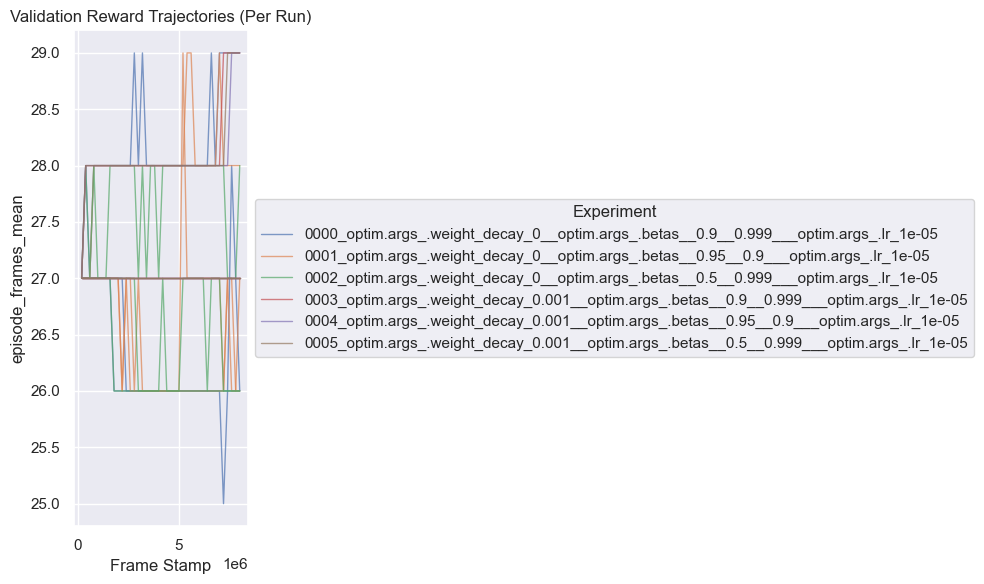

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

selected_metric = 'episode_frames_mean'
hue_col = "experiment_name"  # or another distinguishing column like "sub_experiment_path"

validation_df = df[df['epoch_type'] == 'validation']

# Plot individual lines for each run
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=validation_df,
    x='frame_stamp',
    y=selected_metric,
    hue=hue_col,
    estimator=None,  # ← disables aggregation
    units='sub_experiment_path',  # ← groups lines by unique run
    lw=1,  # line width
    alpha=0.7  # transparency
)

plt.ylabel(selected_metric)
plt.xlabel('Frame Stamp')
plt.title('Validation Reward Trajectories (Per Run)')

# Move legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Experiment')
plt.tight_layout()
plt.show()


In [50]:
### Select data

experiment_columns = [
    'epoch_type', 'frame_stamp',
    'episode_rewards_mean', 'episode_frames_mean', 
    'episode_discounted_rewards_mean',
    'policy_trained_times', 'target_trained_times', 'epoch_time', 
       'seed', 'experiment_name', "sub_experiment_path"
]
hyperparam_columns = [
   col for col in df.columns if "sub_exp_cfg" in col
]

cols_of_interest = experiment_columns + hyperparam_columns

sub_df = df[cols_of_interest]
sub_df = sub_df[sub_df['epoch_type'] == 'validation']
sub_df = sub_df[sub_df['frame_stamp'] == sub_df['frame_stamp'].max()]

sub_df 


,epoch_type,frame_stamp,episode_rewards_mean,episode_frames_mean,episode_discounted_rewards_mean,policy_trained_times,target_trained_times,epoch_time,seed,experiment_name,sub_experiment_path,sub_exp_cfg_optim.args_.weight_decay,sub_exp_cfg_optim.args_.betas,sub_exp_cfg_optim.args_.lr
79,validation,8000000,-7.916940,26.0,-7.417838,NaN,NaN,0 days 00:00:00.638284,0,0000_optim.args_.weight_decay_0__optim.args_.b...,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,"[0.9, 0.999]",1e-05
159,validation,8000000,-8.331370,29.0,-7.760959,NaN,NaN,0 days 00:00:00.614515,1,0000_optim.args_.weight_decay_0__optim.args_.b...,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,"[0.9, 0.999]",1e-05
239,validation,8000000,-7.957895,26.0,-7.459099,NaN,NaN,0 days 00:00:00.659058,2,0000_optim.args_.weight_decay_0__optim.args_.b...,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,"[0.9, 0.999]",1e-05
319,validation,8000000,-8.110634,27.0,-7.588355,NaN,NaN,0 days 00:00:00.631551,0,0001_optim.args_.weight_decay_0__optim.args_.b...,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,"[0.95, 0.9]",1e-05
399,validation,8000000,-8.231202,28.0,-7.684212,NaN,NaN,0 days 00:00:00.641676,1,0001_optim.args_.weight_decay_0__optim.args_.b...,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,"[0.95, 0.9]",1e-05
479,validation,8000000,-7.952939,26.0,-7.450735,NaN,NaN,0 days 00:00:00.693880,2,0001_optim.args_.weight_decay_0__optim.args_.b...,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,"[0.95, 0.9]",1e-05
559,validation,8000000,-7.869755,26.0,-7.372968,NaN,NaN,0 days 00:00:00.561987,0,0002_optim.args_.weight_decay_0__optim.args_.b...,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,"[0.5, 0.999]",1e-05
639,validation,8000000,-8.225667,28.0,-7.677092,NaN,NaN,0 days 00:00:00.575653,1,0002_optim.args_.weight_decay_0__optim.args_.b...,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,"[0.5, 0.999]",1e-05
719,validation,8000000,-7.839556,26.0,-7.348488,NaN,NaN,0 days 00:00:00.645988,2,0002_optim.args_.weight_decay_0__optim.args_.b...,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,"[0.5, 0.999]",1e-05
799,validation,8000000,-8.061466,27.0,-7.531725,NaN,NaN,0 days 00:00:00.533128,0,0003_optim.args_.weight_decay_0.001__optim.arg...,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0.001,"[0.9, 0.999]",1e-05


In [51]:
# agg_cols = [col for col in sub_df.columns if "sub_exp_cfg_agent_params" in col]
# aggregated_df = (
#     sub_df.groupby(agg_cols)
#     .agg(episode_discounted_rewards_mean=("episode_discounted_rewards_mean", "mean"))
#     .reset_index()
# )
# aggregated_df

In [52]:
sub_df.columns

Index(['epoch_type', 'frame_stamp', 'episode_rewards_mean',
       'episode_frames_mean', 'episode_discounted_rewards_mean',
       'policy_trained_times', 'target_trained_times', 'epoch_time', 'seed',
       'experiment_name', 'sub_experiment_path',
       'sub_exp_cfg_optim.args_.weight_decay', 'sub_exp_cfg_optim.args_.betas',
       'sub_exp_cfg_optim.args_.lr'],
      dtype='object')

In [53]:
print(sub_df[sub_df['episode_rewards_mean'] == sub_df['episode_rewards_mean'].max()]['sub_experiment_path'].values[0])



d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dynamics\experiments\results\2025Jun23-095316_configs\0002_optim.args_.weight_decay_0__optim.args_.betas__0.5__0.999___optim.args_.lr_1e-05\2


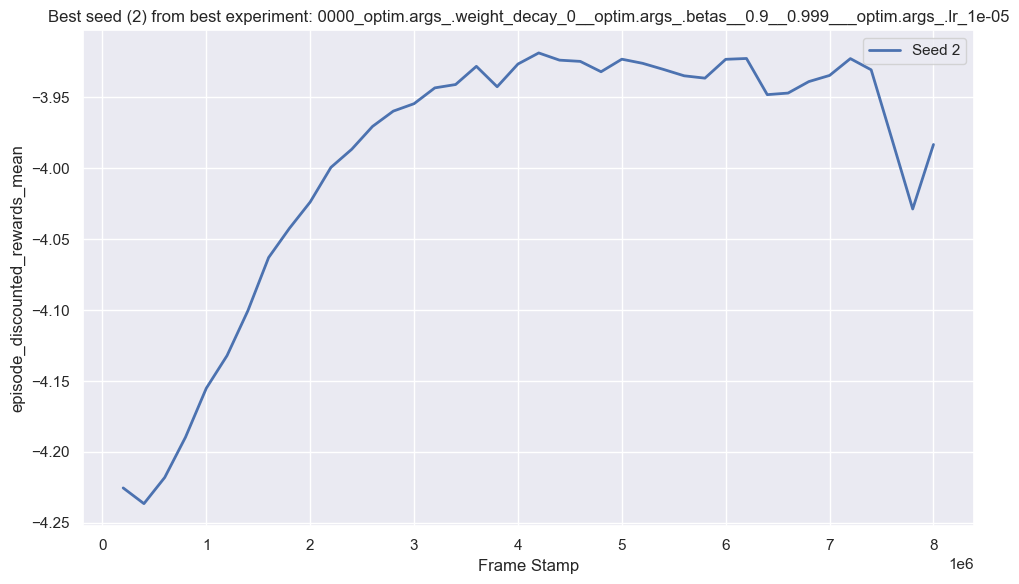

In [54]:
selected_metric = 'episode_discounted_rewards_mean'
hue_col = "experiment_name"

# Filter for training data only
training_df = df[df['epoch_type'] == 'training']
# training_df = df[df['epoch_type'] == 'validation']

# Step 1: Find best experiment
experiment_means = training_df.groupby(hue_col)[selected_metric].mean()
best_experiment = experiment_means.idxmax()

# Step 2: Filter to that experiment
best_exp_df = training_df[training_df[hue_col] == best_experiment]

# Step 3: Find best seed within best experiment
best_seed = (
    best_exp_df.groupby('seed')[selected_metric]
    .mean()
    .idxmax()
)

# Step 4: Filter to best seed
best_seed_df = best_exp_df[best_exp_df['seed'] == best_seed]

# Step 5: Plot
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=best_seed_df,
    x='frame_stamp',
    y=selected_metric,
    lw=2,
    label=f"Seed {best_seed}"
)

plt.title(f"Best seed ({best_seed}) from best experiment: {best_experiment}")
plt.ylabel(selected_metric)
plt.xlabel('Frame Stamp')
plt.legend()
plt.tight_layout()
plt.show()

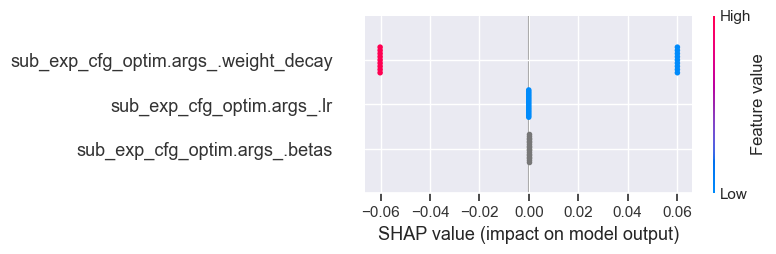

In [55]:
import shap
import xgboost
import pandas as pd


# Define the target metric and hyperparameter columns
target_metric = "episode_rewards_mean"  # Replace with actual metric column name
# Replace with actual hyperparameter column names

# Prepare data
X = sub_df[hyperparam_columns].apply(pd.to_numeric, errors='coerce')
y = sub_df[target_metric].fillna(3 * sub_df[target_metric].min())

# Train an XGBoost model to analyze feature importance
model = xgboost.XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
model.fit(X, y)

# SHAP analysis
explainer = shap.Explainer(model)
shap_values = explainer(X)

# Summary plot (feature importance)
shap.summary_plot(shap_values, X)

In [56]:
hyperparam_columns

['sub_exp_cfg_optim.args_.weight_decay',
 'sub_exp_cfg_optim.args_.betas',
 'sub_exp_cfg_optim.args_.lr']

In [57]:
import plotly.express as px

# Define readable names for selected hyperparams
readable_names = {
    hyperparam_columns[0]: "noise",
    hyperparam_columns[1]: "size"
}

# Rename columns in a copy of the dataframe
plot_df = sub_df.rename(columns=readable_names)

# Assign new column names
x_col = "noise"
y_col = "episode_rewards_mean"
facet_col = "size"

# Plot
fig = px.scatter(
    plot_df,
    x=x_col,
    y=y_col,
    color="experiment_name",  # Optional: color by experiment
    facet_col=facet_col,
    title="Episode Rewards vs. Noise Faceted by Size",
    height=600
)

fig.update_layout(showlegend=False)
fig.show()
